In [1]:
# import ParentImport
import datasets
import torchvision.transforms as transforms
import face_extract
import face_recognition
import pandas as pd
import numpy as np
import torch

from tqdm.auto import tqdm
from matplotlib.pyplot import imshow
# from trainer import Trainer

import matplotlib.pyplot as plt
import json

TRAIN SIZE 6248
TEXT SIZE 695
Empty DataFrame
Columns: [filename, max_faces]
Index: []
6248 ['9bc513e4e366b7d8.mp4' '19ae26f7f3db51fa.mp4' '26ec4ef1a1899c3f.mp4'
 '87060023c00b28c4.mp4' 'ed3660460cb08780.mp4']
695 ['fb1d15ce0eb1e68c.mp4' '8f7ecc23e031b829.mp4' '05f01e4183c6d94b.mp4'
 'a9e6dcab69d29b90.mp4' '525b5d9ca25afeb6.mp4']
rescale is 0.25
JSON filename is stats/face_map_stats-4-20-20210831-095529.json
CSV filename is stats/face_map_stats-4-20-20210831-095529.csv


In [2]:
dataset = datasets.Dataset(basedir='datasets')
print(dataset.is_fake('9a22372d22a52397.mp4'))
dataset.all_videos

TRAIN SIZE 6248
TEXT SIZE 695
1


0       9a22372d22a52397.mp4
1       9bc4f1306bb8e2cd.mp4
2       88fe2a902a9d8cc7.mp4
3       1f3cbda142d0944a.mp4
4       63bed62257daccaf.mp4
                ...         
6938    f5c4bfb20068f129.mp4
6939    b7b7b7f6db7f6e2e.mp4
6940    c3fc75289ae3b41e.mp4
6941    519e97d4c90aaa1c.mp4
6942    38cd7b295a5cfda5.mp4
Name: filename, Length: 6943, dtype: object

In [3]:
filename = 'face_map_stats-4-20-20210830-020048.csv'
path = f'stats/{filename}'

faces_dataframe = pd.read_csv(path)
# del faces_dataframe['Unnamed: 0']
print(faces_dataframe.head())
# faces_dataframe.to_csv(path, index=False)

               filename  frames  face_no  num_faces  top  right  bottom  left
0  9a22372d22a52397.mp4       0        0          1  264   1092     516   844
1  9a22372d22a52397.mp4      20        0          1  236   1120     488   872
2  9a22372d22a52397.mp4      40        0          2  236   1120     488   872
3  9a22372d22a52397.mp4      40        1          2  540   1148     792   900
4  9a22372d22a52397.mp4      60        0          1  264   1120     516   872


In [4]:
faces_dataframe[faces_dataframe['num_faces'] > 1]

,filename,frames,face_no,num_faces,top,right,bottom,left
2,9a22372d22a52397.mp4,40,0,2,236,1120,488,872
3,9a22372d22a52397.mp4,40,1,2,540,1148,792,900
37,88fe2a902a9d8cc7.mp4,40,0,2,236,1120,488,872
38,88fe2a902a9d8cc7.mp4,40,1,2,540,1148,792,900
930,6fee5801f848fba1.mp4,0,0,2,200,660,376,488
...,...,...,...,...,...,...,...,...
392042,8dbb4de72c27723a.mp4,240,1,2,260,700,432,528
392324,38cd7b295a5cfda5.mp4,540,0,2,268,1184,784,668
392325,38cd7b295a5cfda5.mp4,540,1,2,184,900,432,652
392358,38cd7b295a5cfda5.mp4,1340,0,2,268,1184,784,668


In [26]:
faces_dataframe[
    faces_dataframe['filename'] == '38cd7b295a5cfda5.mp4'
][faces_dataframe['frames'] == 540]

/tmp/ipykernel_1586445/87255816.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  faces_dataframe[


,filename,frames,face_no,num_faces,top,right,bottom,left
392324,38cd7b295a5cfda5.mp4,540,0,2,268,1184,784,668
392325,38cd7b295a5cfda5.mp4,540,1,2,184,900,432,652


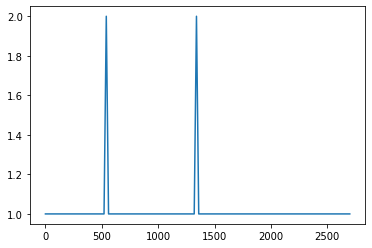

In [32]:
face_data = faces_dataframe[
    faces_dataframe['filename'] == '38cd7b295a5cfda5.mp4'
]
plt.plot(face_data['frames'], face_data['num_faces'])

In [6]:
every_n_frames = 20
vidobj = dataset.read_video(
    '38cd7b295a5cfda5.mp4', rescale=1,
    every_n_frames=every_n_frames
)

(1080, 1920, 3)


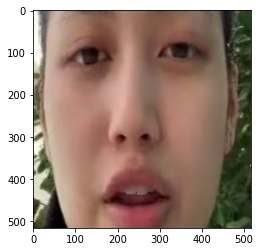

In [28]:
top, right, bottom, left = 268,	1184,	784,	668
image = vidobj.out_video[540 // 20]
print(image.shape)
crop_image = image[top:bottom, left:right]
%matplotlib inline
imshow(crop_image)

(1080, 1920, 3)


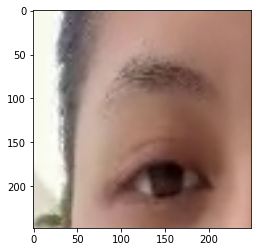

In [29]:
top, right, bottom, left = 	184,	900,	432,	652
image = vidobj.out_video[540 // 20]
print(image.shape)
crop_image = image[top:bottom, left:right]
%matplotlib inline
imshow(crop_image)